In [0]:
from google.colab import files
files.upload()

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import  sklearn
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import svm
from sklearn import naive_bayes
from sklearn import ensemble

Reading data


In [0]:
df = pd.read_csv('fraud_data.csv')
dataset_split_ratio = (len(df[df['Class'] == 1]) / len(df[df['Class'] == 0]))
print('dataset shape: ',df.shape)
print(dataset_split_ratio)

dataset shape:  (21693, 30)
0.016684632328818484


Splitting into train and test sets

In [0]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2,shuffle=True)


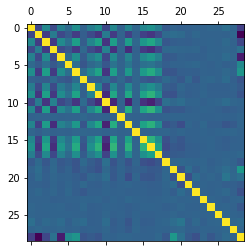

In [0]:
cor_mat=X.corr()                           ## Correlation matrix without including output column
plt.matshow(cor_mat,fignum=0)


In [0]:
cor_mat.style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1,-0.146151,0.215212,-0.128453,0.170542,0.0342794,0.255483,-0.0059856,0.148964,0.256063,-0.151016,0.205795,-0.00432384,0.192462,0.0172017,0.201138,0.270115,0.156644,-0.0538697,-0.000623827,-0.015313,-0.00893367,0.00148526,0.0026384,0.01617,0.0103516,0.0662185,0.00580197,-0.190724
V2,-0.146151,1,-0.208005,0.145315,-0.141299,-0.0444903,-0.204274,-0.0294832,-0.138545,-0.242308,0.136008,-0.20434,-0.00180047,-0.181822,-0.0228417,-0.18184,-0.236582,-0.123575,0.0361514,0.056992,0.039817,-0.0120728,0.0203452,-0.00238507,-0.000586606,0.00122727,-0.004959,0.0260137,-0.466621
V3,0.215212,-0.208005,1,-0.2157,0.232629,0.0698989,0.353663,-0.0325948,0.196321,0.367115,-0.240823,0.351952,-0.000151396,0.341338,0.0230286,0.311715,0.400205,0.224533,-0.0641784,-0.0307784,-0.0140784,-0.0199569,-0.00355778,0.00137733,0.00566504,0.000747471,0.0329733,0.00155267,-0.157018
V4,-0.128453,0.145315,-0.2157,1,-0.133877,-0.0549857,-0.21118,0.0262846,-0.12907,-0.221332,0.175382,-0.259616,0.00835805,-0.272199,-0.0108635,-0.21159,-0.270667,-0.141893,0.0239776,0.0307099,0.0147026,0.012371,0.0192929,-0.0192122,0.00365897,0.00656718,0.018368,0.00757025,0.0776963
V5,0.170542,-0.141299,0.232629,-0.133877,1,0.0387768,0.252781,-0.0444924,0.132767,0.246547,-0.148047,0.215846,-0.00490782,0.189341,-0.00130902,0.219765,0.304218,0.171762,-0.0580857,-0.0391873,-0.00727183,-0.0153785,-0.0190008,-0.0121131,0.00940597,0.00800862,0.0448082,0.0184932,-0.352088
V6,0.0342794,-0.0444903,0.0698989,-0.0549857,0.0387768,1,0.0611771,-0.07404,0.0279475,0.0796839,-0.0661759,0.0927305,0.000675056,0.105945,-0.00302189,0.0744028,0.0968835,0.0364825,-0.0269975,0.00166728,0.00197255,0.00893045,0.0234119,0.000941122,-0.0103162,0.00342195,-0.0149899,-0.00629251,0.228778
V7,0.255483,-0.204274,0.353663,-0.21118,0.252781,0.0611771,1,0.0527924,0.200578,0.382375,-0.235008,0.359017,0.00527772,0.316303,0.0171507,0.336132,0.438167,0.260651,-0.0825117,-0.073006,-0.0226013,-0.0183879,-0.02533,-0.00145506,-0.00330777,-0.00187118,0.0285818,0.00720397,0.295881
V8,-0.0059856,-0.0294832,-0.0325948,0.0262846,-0.0444924,-0.07404,0.0527924,1,-0.0104448,-0.0193428,0.0484353,-0.0568945,0.0235251,-0.0723218,0.0150451,-0.0539843,-0.0929177,-0.0425466,0.0340144,-0.00838525,-0.0592481,0.0280173,-0.055981,0.0136665,0.0239798,0.000252884,0.0461261,-0.0167898,-0.0803379
V9,0.148964,-0.138545,0.196321,-0.12907,0.132767,0.0279475,0.200578,-0.0104448,1,0.185249,-0.140842,0.211801,-0.00471708,0.22754,0.00900874,0.183429,0.262243,0.143446,-0.0355939,-0.0521198,0.0177106,-0.0177296,-0.00891496,0.00348601,-0.0169846,-0.014381,-0.0157162,-0.00280858,-0.0477616
V10,0.256063,-0.242308,0.367115,-0.221332,0.246547,0.0796839,0.382375,-0.0193428,0.185249,1,-0.286465,0.410525,0.00191554,0.407844,0.0141863,0.373206,0.480669,0.267426,-0.0835379,-0.0970623,-0.000795437,-0.0204376,-0.0107624,0.0125132,-0.00990366,-0.0132819,-0.0102329,-0.0125775,-0.0799697


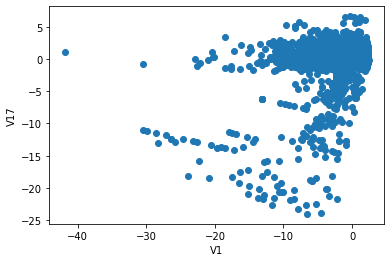

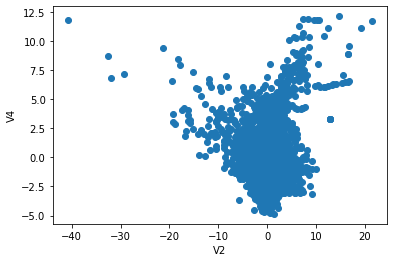

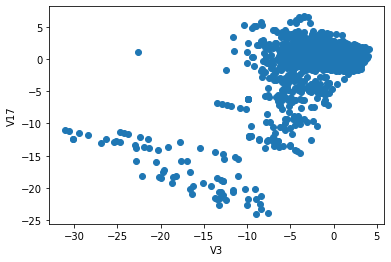

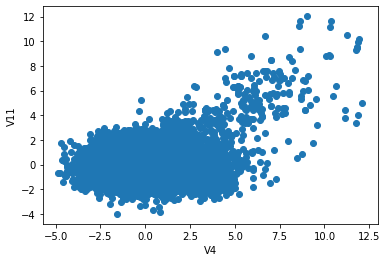

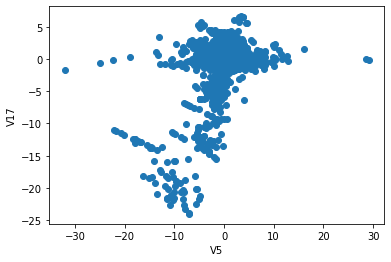

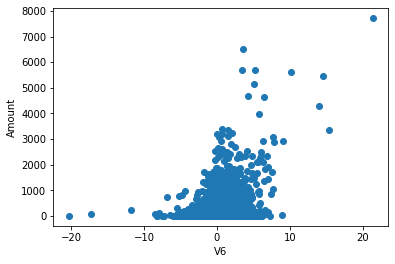

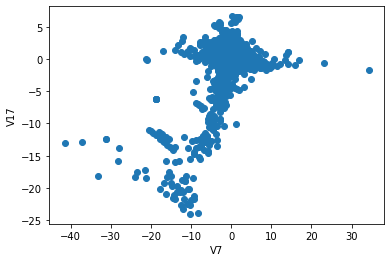

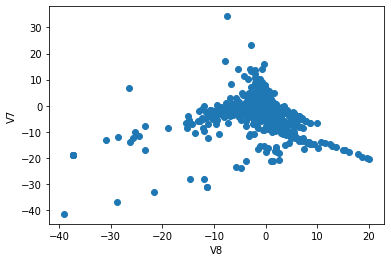

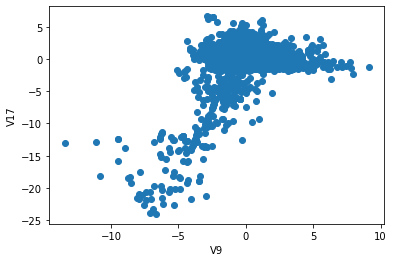

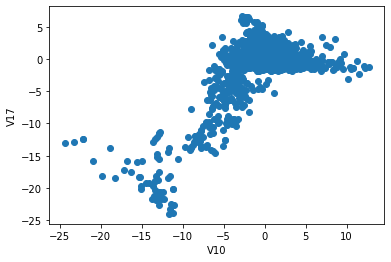

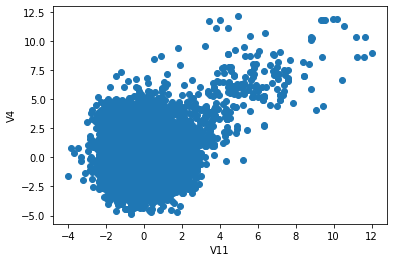

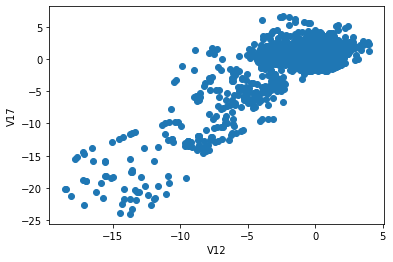

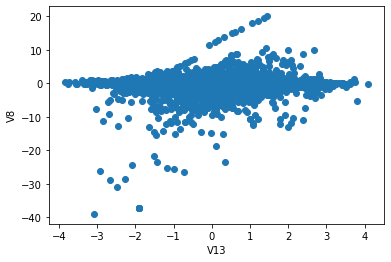

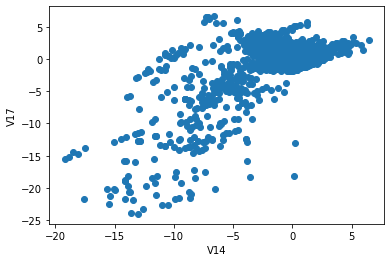

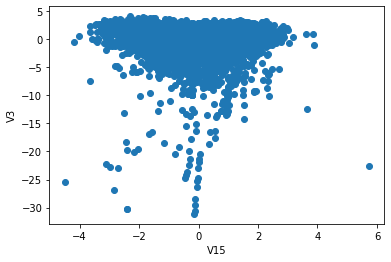

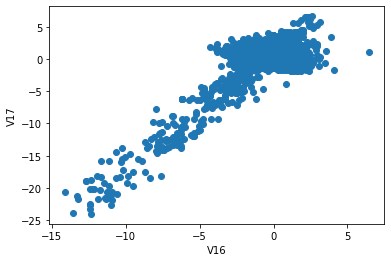

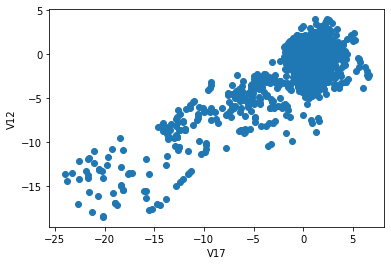

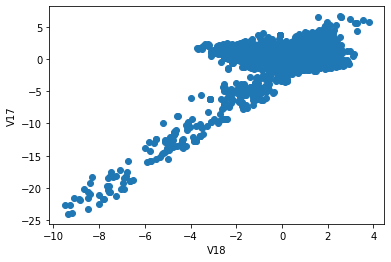

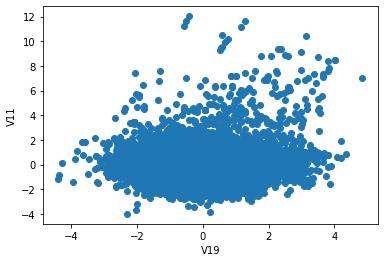

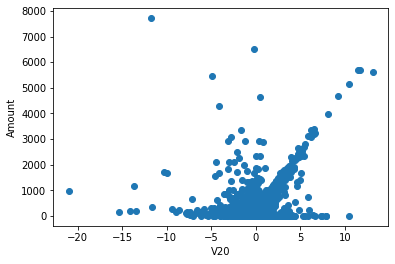

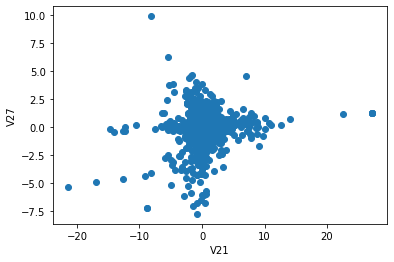

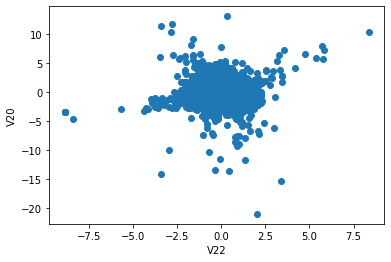

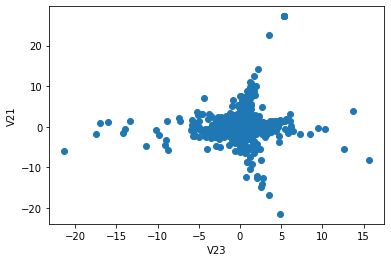

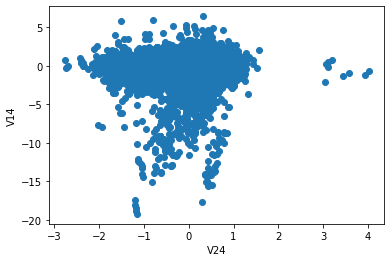

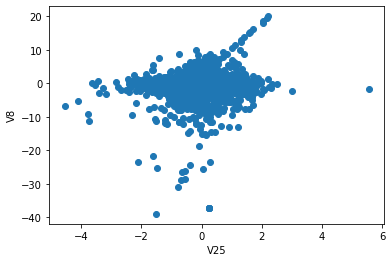

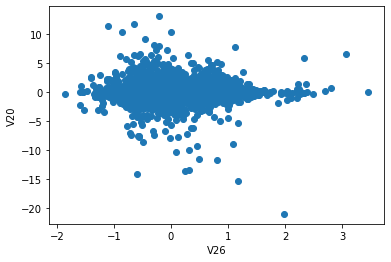

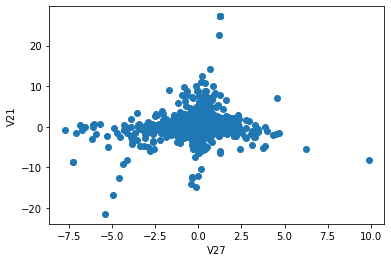

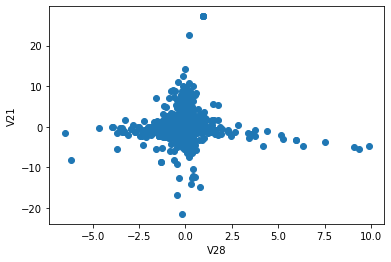

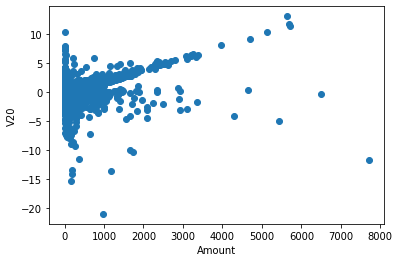

In [0]:
toscatter=[]                                                  ##Finding which data has maximun corelation with which other data field using cor_mat2
for col in cor_mat.columns:                                  ## outcome column is included
    a=cor_mat[col]
    a=a.drop(index=[col])
    maxa=a.max()
    for i in cor_mat[col].keys():
        if cor_mat[col][i]==maxa:
            toscatter.append((col,i))
for i in range(len(toscatter)):
    plt.scatter(df[toscatter[i][0]],df[toscatter[i][1]])     ## Scatter plots  of data fields having considerable cor
    plt.xlabel(toscatter[i][0])
    plt.ylabel(toscatter[i][1])
    plt.show()            

In [0]:
y_train.describe()


count    17354.000000
mean         0.017172
std          0.129915
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [0]:
y_test.describe()


count    4339.000000
mean        0.013367
std         0.114854
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Class, dtype: float64

In [0]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000,17354.000000
mean,-0.034312,0.042637,-0.095802,0.060747,-0.035740,-0.027372,-0.074100,0.011019,-0.042857,-0.092758,0.068836,-0.103314,0.007113,-0.096183,-0.004301,-0.056211,-0.102322,-0.034421,0.022100,-0.006389,0.011898,0.001526,0.000060,-0.002749,-0.001534,0.001266,0.002826,0.004477,86.314155
std,2.132390,1.703243,1.885840,1.550194,1.523853,1.329873,1.587162,1.362026,1.157400,1.348845,1.164338,1.376759,0.990724,1.372193,0.915981,1.107396,1.450424,0.942724,0.847124,0.735854,0.823994,0.735059,0.631134,0.600372,0.521792,0.478739,0.423714,0.314051,229.652595
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-37.060311,-37.353443,-11.126624,-23.228255,-3.995739,-18.553697,-3.749816,-19.214325,-4.498945,-14.129855,-24.019099,-9.335193,-4.366767,-21.024817,-16.922016,-8.887017,-21.303666,-2.766638,-4.084350,-1.596493,-7.764147,-6.520075,0.000000
25%,-0.925639,-0.595365,-0.970714,-0.851097,-0.697855,-0.778012,-0.567103,-0.204955,-0.668040,-0.551135,-0.742127,-0.444278,-0.624120,-0.439267,-0.582135,-0.488407,-0.498744,-0.513901,-0.444277,-0.209527,-0.225393,-0.539828,-0.161515,-0.355987,-0.318082,-0.328155,-0.069903,-0.053251,5.302500
50%,0.014138,0.073000,0.173531,-0.015389,-0.063397,-0.283310,0.033267,0.023125,-0.069947,-0.098428,0.006563,0.121702,-0.012378,0.046375,0.047558,0.058579,-0.079676,-0.021214,0.021665,-0.057521,-0.025120,0.003569,-0.011258,0.036966,0.012466,-0.045956,0.002805,0.012034,21.850000
75%,1.315404,0.815465,1.018958,0.775816,0.616323,0.382161,0.565291,0.330155,0.591899,0.451867,0.783527,0.610237,0.660682,0.492424,0.640774,0.525045,0.388314,0.497279,0.483515,0.139242,0.190454,0.523915,0.146200,0.431306,0.353702,0.241233,0.095906,0.082130,77.787500
max,2.451888,19.167239,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701539,12.018913,3.966626,3.789116,6.441021,5.720479,6.442798,6.609366,3.790316,4.851255,13.119819,27.202839,5.774087,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000


In [0]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,-0.024770,0.067273,-0.074911,0.046040,-0.026955,-0.006549,-0.074612,-0.033589,-0.050124,-0.084334,0.060523,-0.058086,-0.031784,-0.072769,-0.002381,-0.050554,-0.082497,-0.029759,0.020908,0.016743,0.014764,0.012612,-0.008548,-0.001236,0.004103,0.006774,-0.003734,-0.001893,88.624402
std,2.002439,1.640708,1.806871,1.500344,1.556999,1.382700,1.634844,1.598855,1.163271,1.378920,1.112974,1.316102,0.984868,1.290232,0.919087,1.051761,1.318328,0.912661,0.830988,0.695363,0.947035,0.766008,0.625403,0.599299,0.517598,0.476463,0.428568,0.248273,258.243137
min,-28.255053,-29.336007,-30.177317,-4.655639,-18.979785,-17.282140,-41.506796,-38.987263,-13.434066,-24.403185,-3.448393,-17.182918,-3.844974,-14.116156,-4.199321,-12.448562,-22.667905,-9.498746,-4.395283,-7.605660,-21.453736,-8.887017,-17.530682,-2.728650,-4.541819,-1.855355,-7.263482,-3.403856,0.000000
25%,-0.958735,-0.581629,-0.917821,-0.845508,-0.699145,-0.783568,-0.560143,-0.210143,-0.676876,-0.568614,-0.727454,-0.418924,-0.668163,-0.434239,-0.581768,-0.503788,-0.500509,-0.510577,-0.446205,-0.210509,-0.224679,-0.532705,-0.165891,-0.361154,-0.314355,-0.317281,-0.070176,-0.054291,5.730000
50%,-0.016978,0.083452,0.187218,0.003291,-0.069602,-0.275086,0.018683,0.023565,-0.089818,-0.103643,0.003231,0.146174,-0.039569,0.039357,0.056307,0.068433,-0.060789,-0.009912,0.022585,-0.056858,-0.019431,0.025731,-0.014560,0.036567,0.007679,-0.039727,0.001120,0.010315,22.610000
75%,1.317442,0.839119,1.029747,0.764734,0.606162,0.389911,0.558450,0.323041,0.576964,0.421942,0.799214,0.628203,0.622569,0.479053,0.649050,0.526457,0.394746,0.485821,0.492195,0.138489,0.203618,0.553700,0.148160,0.435257,0.355482,0.223877,0.095417,0.079633,74.000000
max,2.360449,21.467203,3.590901,11.805469,28.516513,15.323769,14.209823,8.810473,7.827257,12.254589,9.442665,3.860949,4.099352,5.947222,3.832930,3.152721,4.432619,2.920650,3.656787,11.717431,27.202839,8.361985,5.303607,3.104595,2.034725,3.067907,4.514516,5.958241,6511.000000


Using X_train, X_test, y_train, and y_test (as defined above), train a dummy classifier that classifies everything as the majority class of the training data and Showing their accuracy,recall scores

In [0]:
dm_mj_cls = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_pred = dm_mj_cls.predict(X_test)
print ("accuracy of dummy classifier: ",accuracy_score(y_test, y_dummy_pred))
print("recall of dummy classifier: " ,recall_score(y_test, y_dummy_pred))

accuracy of dummy classifier:  0.9866328647153723
recall of dummy classifier:  0.0


Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using accuracy for scoring and the default 3-fold cross validation.

'penalty': ['l1', 'l2']

'C':[0.01, 0.1, 1, 10, 100]

In [0]:
log_reg = LogisticRegression(max_iter=1000)
grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['none', 'l2']}
   # default metric to optimize over grid parameters
grid_log_reg = GridSearchCV(log_reg, param_grid = grid_values, scoring = 'recall')
grid_log_reg.fit(X_train, y_train)
mat=np.array(grid_log_reg.cv_results_['mean_test_score'].reshape(5,2))
print(mat)
   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[[0.79824859 0.78485876]
 [0.79824859 0.79830508]
 [0.79824859 0.79485876]
 [0.79824859 0.79824859]
 [0.79824859 0.79824859]]


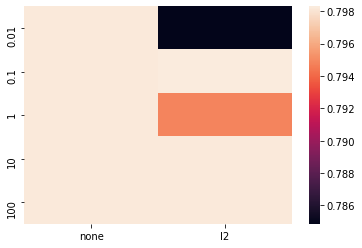

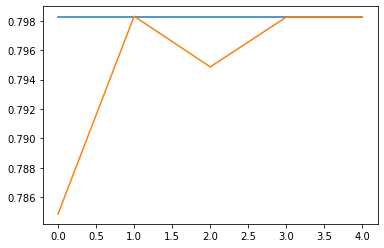

In [0]:
plt.figure()
sns.heatmap(mat, xticklabels=['none','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.figure()
plt.plot(mat)


Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters and finding accuracy, recall, and precision of this classifier

In [0]:
svm_default = SVC()
svm_default.fit(X_train, y_train)
y_pred = svm_default.predict(X_test)
    
print("Accuracy of default params svm: ",accuracy_score(y_test, y_pred))
print("recall of default params svm: ", recall_score(y_test, y_pred))
print("precision of default params svm: ", precision_score(y_test, y_pred))

Accuracy of default params svm:  0.9919336252592763
recall of default params svm:  0.43103448275862066
precision of default params svm:  0.9259259259259259


Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer with parameters {'C': 1e9, 'gamma': 1e-07} and finding accuracy, recall, and precision of this classifier

In [0]:
svm_given_params = SVC(C = 1e9, gamma = 1e-07)
svm_given_params.fit(X_train, y_train)
y_pred = svm_default.predict(X_test)
    
print("Accuracy of given params svm: ",accuracy_score(y_test, y_pred))
print("recall of given params svm: ", recall_score(y_test, y_pred))
print("precision of given params svm: ", precision_score(y_test, y_pred))

Accuracy of given params svm:  0.9919336252592763
recall of given params svm:  0.43103448275862066
precision of given params svm:  0.9259259259259259


For the above model, the confusion matrix when using a threshold of -220 on the decision function. Using X_test and y_test.

In [0]:
svm_predicted = svm_given_params.decision_function(X_test) > -220
cfs_mat = confusion_matrix(y_test, svm_predicted)
print(cfs_mat)

[[4268   13]
 [   9   49]]


Applying Random Forest algorithm with 500 trees in forest

In [0]:
rdm_forest=sklearn.ensemble.RandomForestClassifier(n_estimators=500,criterion='gini')#,oob_score=True,warm_start=True)#,min_weight_fraction_leaf=0.00015,max_features=8,min_samples_split=5,oob_score=True)
rdm_forest.fit(X_train,y_train)
rdm_forest.score(X_test,y_test)

0.9976953215026504

In [0]:
base_model = sklearn.ensemble.RandomForestClassifier()
grid_values = {'n_estimators': [150, 250, 500, 100], 'criterion': ['gini', 'entropy']}
   # default metric to optimize over grid parameters
grid_forest = GridSearchCV(base_model, param_grid = grid_values, scoring = 'recall')
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

Recall results of gridsearched forest: 
[[0.81502825 0.81163842]
 [0.80824859 0.80830508]
 [0.80152542 0.80491525]
 [0.80491525 0.79813559]]


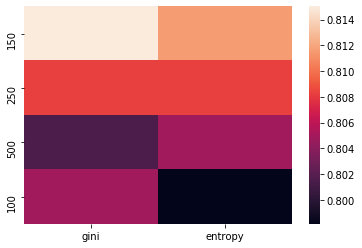

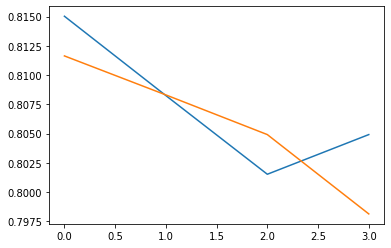

In [0]:
forest_results=np.array(grid_forest.cv_results_['mean_test_score'].reshape(4,2))
print("Recall results of gridsearched forest: ")
print(forest_results)
plt.figure()
sns.heatmap(forest_results, xticklabels=['gini','entropy'], yticklabels=[150, 250,500, 100])
plt.figure()
plt.plot(forest_results)

In [0]:
deepnn= Sequential([
                    Dense(64,input_shape=(29,),kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),                              
                    Dense (128,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),    
                    Dense(256,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(512,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(256,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(32,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(64,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(16,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(4,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.relu),
                    Dense(2,kernel_initializer=tf.keras.initializers.he_uniform(),kernel_regularizer=tf.contrib.layers.l2_regularizer(0.001),activation=tf.nn.softmax)
])
ord_loss='sparse_categorical_crossentropy'
deepnn.compile(optimizer='adam',loss=ord_loss,metrics=['accuracy'])




In [0]:
deepnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_37 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_38 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_41 (Dense)             (None, 64)               

In [0]:
deepnn.fit(x=X_train,y=y_train,batch_size=16,epochs=100,validation_split=0.5)
ls,acc=deepnn.evaluate(X_test,y_test)
print('loss over test set : ',ls,' & accuracy over test set: ',acc)

Train on 8677 samples, validate on 8677 samples
Epoch 1/100
8677/8677 [==============================] - 5s 627us/sample - loss: 0.0320 - acc: 0.9950 - val_loss: 0.0275 - val_acc: 0.9957
Epoch 2/100
8677/8677 [==============================] - 5s 631us/sample - loss: 0.0323 - acc: 0.9947 - val_loss: 0.0309 - val_acc: 0.9949
Epoch 3/100
8677/8677 [==============================] - 5s 610us/sample - loss: 0.0326 - acc: 0.9947 - val_loss: 0.0286 - val_acc: 0.9956
Epoch 4/100
8677/8677 [==============================] - 6s 649us/sample - loss: 0.0333 - acc: 0.9944 - val_loss: 0.0339 - val_acc: 0.9950
Epoch 5/100
8677/8677 [==============================] - 6s 651us/sample - loss: 0.0325 - acc: 0.9947 - val_loss: 0.0275 - val_acc: 0.9962
Epoch 6/100
8677/8677 [==============================] - 6s 668us/sample - loss: 0.0284 - acc: 0.9961 - val_loss: 0.0248 - val_acc: 0.9965
Epoch 7/100
8677/8677 [==============================] - 6s 661us/sample - loss: 0.0337 - acc: 0.9944 - val_loss: 0.03